In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import sympy as sy
from sympy.solvers import solve
import pandas as pd
from numpy import exp, loadtxt, pi, sqrt
import lmfit as lm
from lmfit import Model
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
df1=pd.DataFrame.from_csv('A2_Schuster.csv',sep=';',encoding='utf-8')
#df1 #Zeigt dir die Tabelle an
df2=df1.sort_values('r in cm')
r=df2['r in m']= df2['r in cm']*1e-2
B=df2['B in T']=df2['B in mT']*1e-3
U=df2['U in V']
df2

,U in V,r in cm,B in mT,r in m,B in T
NaT,250,2,2.86,0.02,0.00286
NaT,200,2,2.65,0.02,0.00265
NaT,190,2,2.57,0.02,0.00257
NaT,220,2,2.74,0.02,0.00274
NaT,180,2,2.51,0.02,0.00251
NaT,170,2,2.45,0.02,0.00245
NaT,230,2,2.79,0.02,0.00279
NaT,160,2,2.40,0.02,0.00240
NaT,240,2,2.83,0.02,0.00283
NaT,150,2,2.34,0.02,0.00234


In [3]:
def func(x,a,b):
    return a*x+b

{'a': 177872806061.8728, 'b': -90.500475797698513}
[  5.24434255e+09   1.48306642e+01]


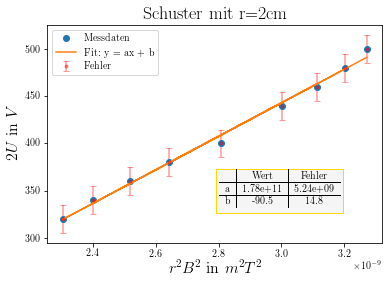

In [4]:
u=0;v=9
x=r[u:v]**2*B[u:v]**2;y=2*U[u:v]
gmodel = Model(func)
result = gmodel.fit(y, x=x, a=1.7e11, b=10)
pcov= result.covar
perr = np.sqrt(np.diag(pcov))
#print(result.fit_report())
print(result.best_values)
popt=result.best_values
print(perr)
plt.plot(x, y,'o',color='C0',label=r'Messdaten')
plt.errorbar(x[u:v], y[u:v], yerr=perr[1], fmt='.',color='r',capsize=3, label='Fehler',alpha=0.4)
plt.plot(x, result.best_fit,'-',color='C1',label=r'Fit: y = ax + b')

s2=r'''\begin{tabular}{ c | c | c } %s & Wert & Fehler \\\hline %s & %4.3g & %3.3g \\\hline %s &%3.3g & %3.3g \end{tabular}'''%('','a',popt['a'],perr[0],'b',popt['b'],perr[1])      
plt.text(2.8*1e-9,350,s2,ha="left",va="center",bbox=dict(boxstyle="square",ec='gold',fc='whitesmoke',))
plt.xlabel(r'$r^{2}B^{2}$ in $m^2 T^2$',fontsize=16)
plt.ylabel(r'$2U$ in $V$',fontsize=16)
    
plt.title(r'Schuster mit r=2cm',fontsize=18)
plt.legend(loc='upper left')
#plt.savefig("Schuster_2cm.pdf", bbox_inches='tight', format='pdf')
plt.show()

{'a': 177872806061.8728, 'b': -90.500475797698513}
Fehler [a,b]: [  5.24434255e+09   1.48306642e+01]


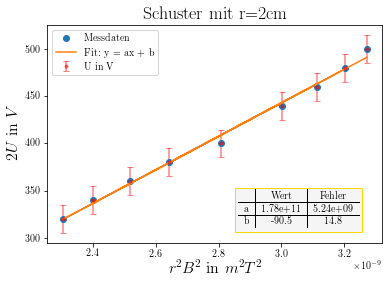

{'a': 170564490805.70499, 'b': -45.86010035572145}
Fehler [a,b]: [  1.91968914e+10   4.59388610e+01]


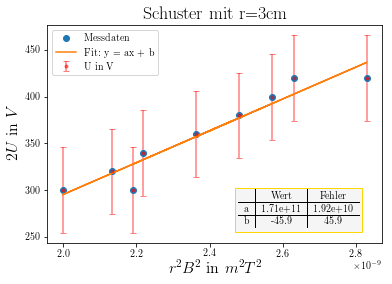

{'a': 160840249486.74936, 'b': 12.657340418622379}
Fehler [a,b]: [  1.17416132e+10   3.13598134e+01]


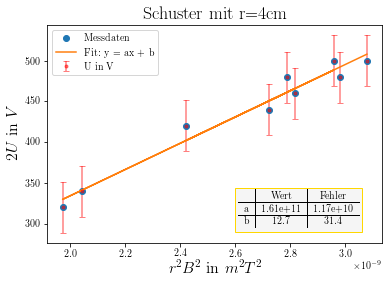

{'a': 201743099627.70547, 'b': -68.65984544273789}
Fehler [a,b]: [  1.74996920e+10   4.11047607e+01]


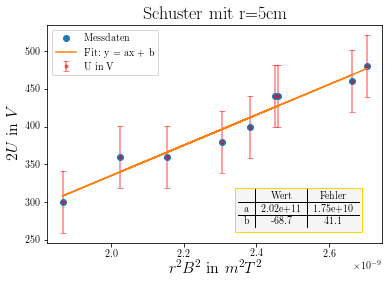

In [13]:
u=0;v=9;g=2
while v<= len(r):
    
    x=r[u:v]**2*B[u:v]**2;y=2*U[u:v]
    gmodel = Model(func)
    result = gmodel.fit(y, x=x, a=1.7e11, b=10)
    pcov= result.covar
    perr = np.sqrt(np.diag(pcov))
    #print(result.fit_report())
    print(result.best_values)
    popt=result.best_values
    print('Fehler [a,b]:',perr)
    plt.plot(x, y,'o',color='C0',label=r'Messdaten')
    plt.errorbar(x, y, yerr=perr[1], fmt='.',color='r',capsize=3,alpha=0.5)
    plt.plot(x, result.best_fit,'-',color='C1',label=r'Fit: y = ax + b')

    ax=plt.axes()
    s2=r'''\begin{tabular}{ c | c | c } %s & Wert & Fehler \\\hline %s & %4.3g & %3.3g \\\hline %s &%3.3g & %3.3g \end{tabular}'''%('','a',popt['a'],perr[0],'b',popt['b'],perr[1])      
    plt.text(0.75, 0.15,s2,horizontalalignment='center',verticalalignment='center',
             transform = ax.transAxes, bbox=dict(boxstyle="square",ec='gold',fc='whitesmoke'))
    plt.xlabel(r'$r^{2}B^{2}$ in $m^2 T^2$',fontsize=16)
    plt.ylabel(r'$2U$ in $V$',fontsize=16)
    plt.title(r'Schuster mit r='+str(g)+'cm',fontsize=18)
    plt.legend(loc='upper left')
    #plt.savefig("Schuster_"+g+"cm.pdf", bbox_inches='tight', format='pdf')
    plt.show()
    
    u+=9;v+=9;g+=1

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 44
    # variables        = 2
    chi-square         = 42284.9414
    reduced chi-square = 1006.78432
    Akaike info crit   = 306.191854
    Bayesian info crit = 309.760233
[[Variables]]
    a:  1.4385e+11 +/- 1.2482e+10 (8.68%) (init = 1.7e+11)
    b:  42.6717858 +/- 31.3727890 (73.52%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.988

{'a': 143848463858.85895, 'b': 42.671785831877528}
Fehler [a,b]: [  1.24819742e+10   3.13727890e+01]


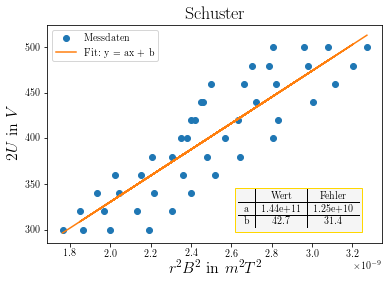

In [15]:
x=r**2*B**2;y=2*U
gmodel = Model(func)
result = gmodel.fit(y, x=x, a=1.7e11, b=10)
pcov= result.covar
perr = np.sqrt(np.diag(pcov))
print(result.fit_report())
print(result.best_values)
popt=result.best_values
print('Fehler [a,b]:',perr)
plt.plot(x, y,'o',color='C0',label=r'Messdaten')
#plt.errorbar(x, y, yerr=perr[1], fmt='.',color='r',capsize=3, label='Fehler',alpha=0.4)
plt.plot(x, result.best_fit,'-',color='C1',label=r'Fit: y = ax + b')

ax=plt.axes()
    
s2=r'''\begin{tabular}{ c | c | c } %s & Wert & Fehler \\\hline %s & %4.3g & %3.3g \\\hline %s &%3.3g & %3.3g \end{tabular}'''%('','a',popt['a'],perr[0],'b',popt['b'],perr[1])      
plt.text(0.75, 0.15,s2,horizontalalignment='center',verticalalignment='center',
             transform = ax.transAxes, bbox=dict(boxstyle="square",ec='gold',fc='whitesmoke'))
plt.xlabel(r'$r^{2}B^{2}$ in $m^2 T^2$',fontsize=16)
plt.ylabel(r'$2U$ in $V$',fontsize=16)
    
plt.title(r'Schuster',fontsize=18)
plt.legend(loc='upper left')
#plt.savefig("Schuster_ges.pdf", bbox_inches='tight', format='pdf')
plt.show()

## Methode nach Busch

In [17]:
df3=pd.DataFrame.from_csv('A2_Busch.csv',sep=';',encoding='utf-8')
df3 #Zeigt dir die Tabelle an
df4=df3.sort_values(['n','U in V'])
n=df4['n']
B=df4['B in T']=df4['B in mT']*1e-3
U=df4['U in V']
df4

,U in V,n,B in mT,B in T
Nr.,,,,
1,572,1,-4.16,-0.00416
4,617,1,-4.12,-0.00412
7,670,1,-4.45,-0.00445
10,730,1,-4.55,-0.00455
13,805,1,-4.60,-0.00460
16,895,1,-5.24,-0.00524
19,1010,1,-5.78,-0.00578
2,572,2,-7.50,-0.00750
5,617,2,-7.93,-0.00793


{'a': 118210690756.50391, 'b': 15017.346085219613}
Fehler [a,b]: [  1.49455522e+10   5.82745375e+03]


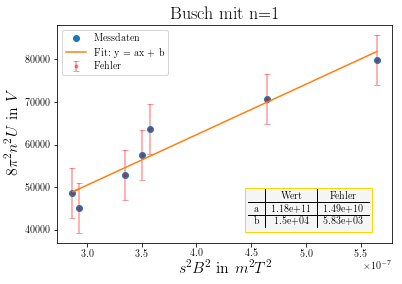

{'a': 190250289249.11023, 'b': -1588.3994402607618}
Fehler [a,b]: [  1.10997182e+10   1.42895835e+04]


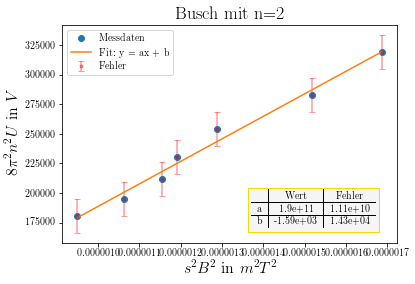

{'a': 277415146773.13092, 'b': -147310.79612220183}
Fehler [a,b]: [  1.91612701e+10   4.55764224e+04]


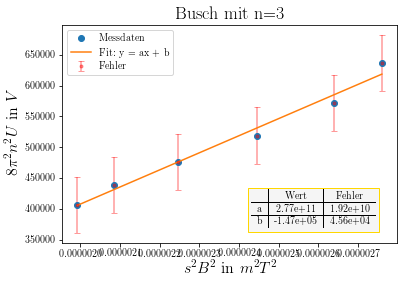

In [19]:
u=0;v=7
x=(0.13**2)*B[u:v]**2; y=8*(np.pi**2)*(n[u:v]**2)*U[u:v]
gmodel = Model(func,nan_policy='omit')
result = gmodel.fit(y, x=x, a=1.7e11, b=10)
pcov= result.covar
perr = np.sqrt(np.diag(pcov))
#print(result.fit_report())
print(result.best_values)
popt=result.best_values
print('Fehler [a,b]:',perr)
plt.plot(x, y,'o',color='C0',label=r'Messdaten')
plt.errorbar(x, y, yerr=perr[1], fmt='.',color='r',capsize=3, label='Fehler',alpha=0.4)
plt.plot(x, result.best_fit,'-',color='C1',label=r'Fit: y = ax + b')

ax=plt.axes()
s2=r'''\begin{tabular}{ c | c | c } %s & Wert & Fehler \\\hline %s & %4.3g & %3.3g \\\hline %s &%3.3g & %3.3g \end{tabular}'''%('','a',popt['a'],perr[0],'b',popt['b'],perr[1])      
plt.text(0.75, 0.15,s2,horizontalalignment='center',verticalalignment='center',
             transform = ax.transAxes, bbox=dict(boxstyle="square",ec='gold',fc='whitesmoke'))
plt.xlabel(r'$s^{2}B^{2}$ in $m^2 T^2$',fontsize=16)
plt.ylabel(r'$8 \pi^{2} n^{2} U$ in $V$',fontsize=16)
plt.title(r'Busch mit n='+str(1),fontsize=18)
plt.legend(loc='upper left')
#plt.savefig("Schuster_"+g+"cm.pdf", bbox_inches='tight', format='pdf')
plt.show()

u=7;v=14
x=(0.13**2)*B[u:v]**2; y=8*(np.pi**2)*(n[u:v]**2)*U[u:v]
gmodel = Model(func,nan_policy='omit')
result = gmodel.fit(y, x=x, a=1.7e11, b=10)
pcov= result.covar
perr = np.sqrt(np.diag(pcov))
#print(result.fit_report())
print(result.best_values)
popt=result.best_values
print('Fehler [a,b]:',perr)
plt.plot(x, y,'o',color='C0',label=r'Messdaten')
plt.errorbar(x, y, yerr=perr[1], fmt='.',color='r',capsize=3, label='Fehler',alpha=0.4)
plt.plot(x, result.best_fit,'-',color='C1',label=r'Fit: y = ax + b')

ax=plt.axes()
s2=r'''\begin{tabular}{ c | c | c } %s & Wert & Fehler \\\hline %s & %4.3g & %3.3g \\\hline %s &%3.3g & %3.3g \end{tabular}'''%('','a',popt['a'],perr[0],'b',popt['b'],perr[1])      
plt.text(0.75, 0.15,s2,horizontalalignment='center',verticalalignment='center',
             transform = ax.transAxes, bbox=dict(boxstyle="square",ec='gold',fc='whitesmoke'))
plt.xlabel(r'$s^{2}B^{2}$ in $m^2 T^2$',fontsize=16)
plt.ylabel(r'$8 \pi^{2} n^{2} U$ in $V$',fontsize=16)
plt.title(r'Busch mit n='+str(2),fontsize=18)
plt.legend(loc='upper left')
#plt.savefig("Schuster_"+g+"cm.pdf", bbox_inches='tight', format='pdf')
plt.show()

u=14;v=20
x=(0.13**2)*B[u:v]**2; y=8*(np.pi**2)*(n[u:v]**2)*U[u:v]
gmodel = Model(func,nan_policy='omit')
result = gmodel.fit(y, x=x, a=1.7e11, b=10)
pcov= result.covar
perr = np.sqrt(np.diag(pcov))
#print(result.fit_report())
print(result.best_values)
popt=result.best_values
print('Fehler [a,b]:',perr)
plt.plot(x, y,'o',color='C0',label=r'Messdaten')
plt.errorbar(x, y, yerr=perr[1], fmt='.',color='r',capsize=3, label='Fehler',alpha=0.4)
plt.plot(x, result.best_fit,'-',color='C1',label=r'Fit: y = ax + b')

ax=plt.axes()
s2=r'''\begin{tabular}{ c | c | c } %s & Wert & Fehler \\\hline %s & %4.3g & %3.3g \\\hline %s &%3.3g & %3.3g \end{tabular}'''%('','a',popt['a'],perr[0],'b',popt['b'],perr[1])      
plt.text(0.75, 0.15,s2,horizontalalignment='center',verticalalignment='center',
             transform = ax.transAxes, bbox=dict(boxstyle="square",ec='gold',fc='whitesmoke'))
plt.xlabel(r'$s^{2}B^{2}$ in $m^2 T^2$',fontsize=16)
plt.ylabel(r'$8 \pi^{2} n^{2} U$ in $V$',fontsize=16)
plt.title(r'Busch mit n='+str(3),fontsize=18)
plt.legend(loc='upper left')
#plt.savefig("Schuster_"+g+"cm.pdf", bbox_inches='tight', format='pdf')
plt.show()

{'a': 226406760693.91489, 'b': -33692.219214879151}
Fehler [a,b]: [  4.71616504e+09   7.19978465e+03]


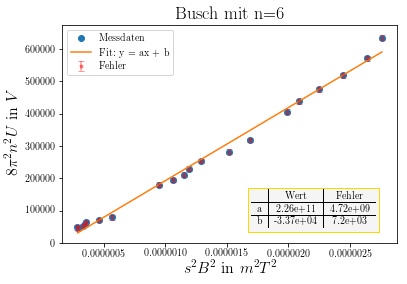

In [20]:
x=(0.13**2)*B**2; y=8*(np.pi**2)*(n**2)*U
gmodel = Model(func,nan_policy='propagate')
result = gmodel.fit(y, x=x, a=1.7e11, b=10)
pcov= result.covar
perr = np.sqrt(np.diag(pcov))
#print(result.fit_report())
print(result.best_values)
popt=result.best_values
print('Fehler [a,b]:',perr)
plt.plot(x, y,'o',color='C0',label=r'Messdaten')
plt.errorbar(x, y, yerr=perr[1], fmt='.',color='r',capsize=3, label='Fehler',alpha=0.4)
plt.plot(x, result.best_fit,'-',color='C1',label=r'Fit: y = ax + b')

ax=plt.axes()
s2=r'''\begin{tabular}{ c | c | c } %s & Wert & Fehler \\\hline %s & %4.3g & %3.3g \\\hline %s &%3.3g & %3.3g \end{tabular}'''%('','a',popt['a'],perr[0],'b',popt['b'],perr[1])      
plt.text(0.75, 0.15,s2,horizontalalignment='center',verticalalignment='center',
             transform = ax.transAxes, bbox=dict(boxstyle="square",ec='gold',fc='whitesmoke'))
plt.xlabel(r'$s^{2}B^{2}$ in $m^2 T^2$',fontsize=16)
plt.ylabel(r'$8 \pi^{2} n^{2} U$ in $V$',fontsize=16)
plt.title(r'Busch mit n='+str(g),fontsize=18)
plt.legend(loc='upper left')
#plt.savefig("Schuster_"+g+"cm.pdf", bbox_inches='tight', format='pdf')
plt.show()